In [1]:
# %pip install matplotlib

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# load the dataframe...and some experimenting

In [4]:
df = pd.read_csv("wines.csv")

In [5]:
df.head(10)

,Unnamed: 0,country,description,name,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [6]:
df.shape

(129971, 14)

In [7]:
target_price = 10
percent_at_price = len(df.loc[df["price"] == target_price]) / len(df) * 100
percent_above_price = len(df.loc[df["price"] > target_price]) / len(df) * 100
percent_below_price = len(df.loc[df["price"] < target_price]) / len(df) * 100

print(percent_at_price)
print(percent_above_price)
print(percent_below_price)

2.645974871317448
88.2466088588993
2.1858722330366005


# how many wines score 100

In [9]:
len(df.loc[df["points"] == 100])

19

# most expensive wine

In [11]:
priciest_wine_winery = df.loc[df["price"] == df["price"].max()]["winery"].squeeze()

priciest_wine_type = df.loc[df["price"] == df["price"].max()]["variety"].squeeze()

priciest_wine_price = df.loc[df["price"] == df["price"].max()]["price"].squeeze()

priciest_wine_name = df.loc[df["price"] == df["price"].max()]["name"].squeeze()


print("name:", priciest_wine_name, "a", priciest_wine_type, "from", priciest_wine_winery, "with the price of", priciest_wine_price)

name: Glamorosa Sensible a Bordeaux-style Red Blend from Château les Ormes Sorbet with the price of 3300.0


# new column, scores 1-5

In [13]:
df.insert(5, 'points 1-5', df["points"] / 20)

In [14]:
df.head()

,Unnamed: 0,country,description,name,points,points 1-5,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,4.35,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,4.35,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,4.35,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,4.35,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,4.35,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# price histogram for wines that are less than $100

<Axes: >

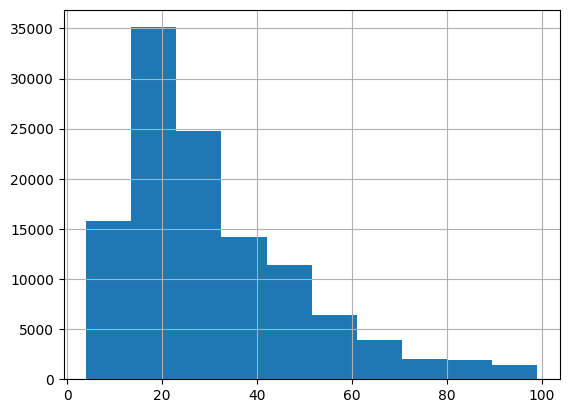

In [16]:
df.loc[df["price"] < 100]["price"].hist()

# price against score

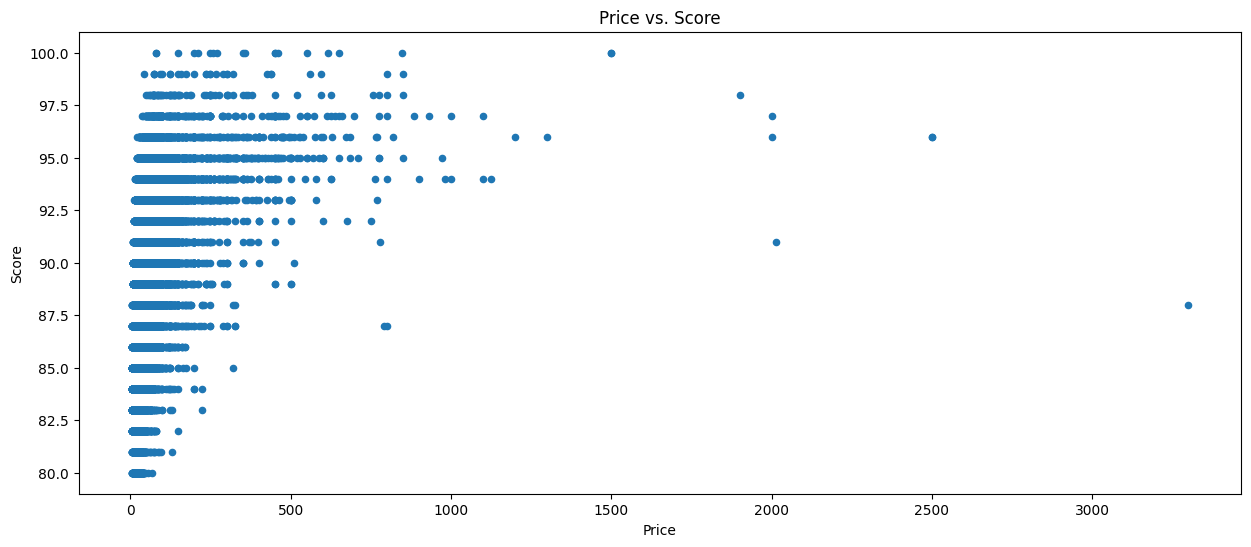

In [18]:
df.plot(y='points', x='price', figsize = (15, 6), kind='scatter')
plt.title('Price vs. Score')
plt.xlabel('Price')
plt.ylabel('Score')
plt.show()

# test correlation

In [20]:
correlation = df['price'].corr(df['points'])
print(f"Correlation of price to points: {correlation}")

Correlation of price to points: 0.4161667418606219


# remove outliers

In [22]:
z_scores = (df["price"] - df["price"].mean()) / df["price"].std()
z_scores.head()

0         NaN
1   -0.496399
2   -0.520776
3   -0.545153
4    0.722453
Name: price, dtype: float64

In [23]:
df_sine_outliers = df[z_scores.abs() < 3]
df_sine_outliers

,Unnamed: 0,country,description,name,points,points 1-5,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,4.35,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,4.35,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,4.35,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,4.35,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,4.35,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,4.50,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,4.50,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,4.50,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,4.50,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## tests with df sine outliers

In [25]:
correlation = df_sine_outliers['price'].corr(df_sine_outliers['points'])
print(f"Correlation of price to points: {correlation}")

Correlation of price to points: 0.543822336006063


In [26]:
df.shape[0] - df_sine_outliers.shape[0]

10173

In [27]:
df_sine_outliers.loc[df_sine_outliers["price"] == df_sine_outliers["price"].min()]

,Unnamed: 0,country,description,name,points,points 1-5,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1987,1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.25,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.25,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.20,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
31530,31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.20,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit
59507,59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.15,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties
61768,61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.20,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
64590,64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.30,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
110255,110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.20,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit
112919,112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.20,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
117303,117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.10,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis


In [28]:
df_sine_outliers.loc[df_sine_outliers["points"] == df_sine_outliers["points"].min()]

,Unnamed: 0,country,description,name,points,points 1-5,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
344,344,Chile,"Aromas of pumpkin, squash and corn chips are s...",Gran Reserva,80,4.0,19.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,Viña Tarapacá 2015 Gran Reserva Chardonnay (Le...,Chardonnay,Viña Tarapacá
3640,3640,Portugal,Aromas of strawberry sherbet are followed by s...,Estreia,80,4.0,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Viniverde 2011 Estreia Rosé (Vinho Verde),Rosé,Viniverde
3641,3641,Chile,"Fluffy, sweet aromas of peach, pear and vanill...",Reserve,80,4.0,15.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Cuevas del Sur 2010 Reserve Chardonnay (Maule ...,Chardonnay,Cuevas del Sur
4556,4556,Italy,"There's a thorny, almost raw quality of fruit ...",Rondineto,80,4.0,12.0,Central Italy,Colli Aprutini,NaN,NaN,NaN,Fattoria Giuseppe Savini 2011 Rondineto Merlot...,Merlot,Fattoria Giuseppe Savini
4557,4557,Spain,"With dusty, candied aromas, the bouquet on thi...",Demi Sec,80,4.0,14.0,Catalonia,Cava,NaN,Michael Schachner,@wineschach,Paul Cheneau NV Demi Sec Sparkling (Cava),Sparkling Blend,Paul Cheneau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128258,128258,US,This Chardonnay-Viognier blend is slightly swe...,Devil's Daughter,80,4.0,25.0,California,Contra Costa County,Central Coast,NaN,NaN,Bloomfield 2008 Devil's Daughter White (Contra...,White Blend,Bloomfield
128259,128259,US,"While there's some nice, honest fruit here, it...",NaN,80,4.0,14.0,Missouri,Missouri,NaN,NaN,NaN,Montelle 2008 Chambourcin (Missouri),Chambourcin,Montelle
128260,128260,US,"Banana, clove and orange peel open for this sw...",Lucky Twenty,80,4.0,12.0,Colorado,Colorado,NaN,NaN,NaN,BookCliff NV Lucky Twenty White (Colorado),White Blend,BookCliff
128261,128261,US,"Short and slightly sweet, there's nutty overto...",Proprietor's Reserve,80,4.0,13.0,Pennsylvania,Pennsylvania,NaN,NaN,NaN,Chaddsford 2007 Proprietor's Reserve White (Pe...,White Blend,Chaddsford


<Axes: xlabel='price', ylabel='points'>

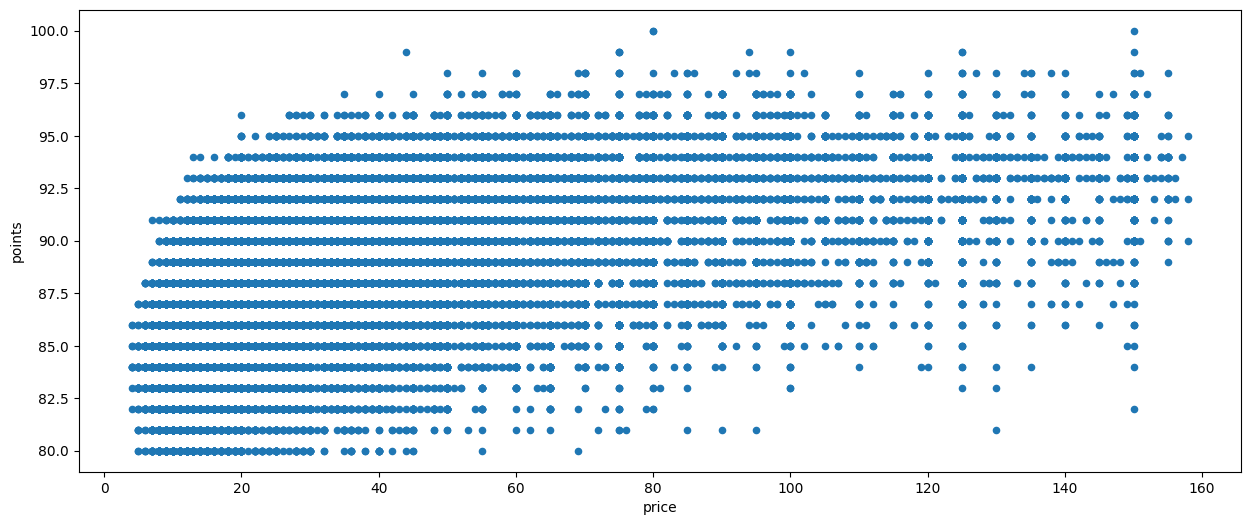

In [29]:
df_sine_outliers.plot(y='points', x='price', figsize=(15, 6), kind='scatter')

<Axes: >

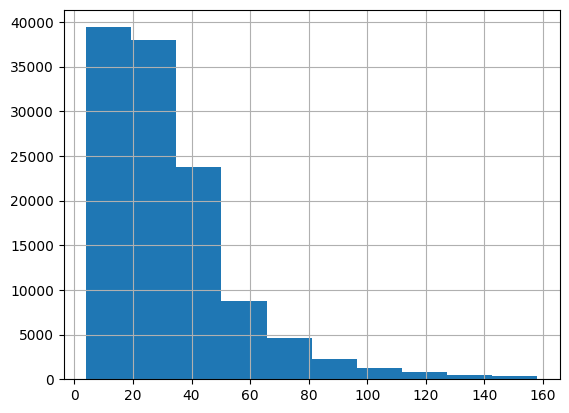

In [30]:
df_sine_outliers["price"].hist()

<Axes: >

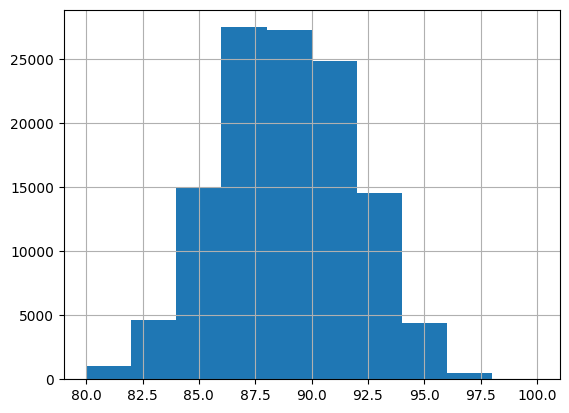

In [31]:
df_sine_outliers["points"].hist()